In [44]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Reading the train data

In [45]:
df_train = pd.read_csv("../Data/House Price Prediction/train.csv")
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Adding year and month columns based on date

In [46]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


# Creating a pivot table based on the price

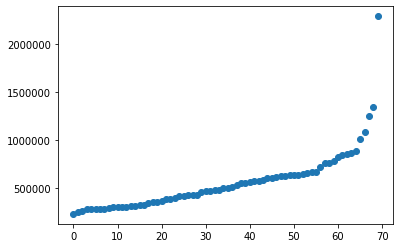

In [47]:
table_zip = pd.pivot_table(df_train, values='price', index='zipcode', aggfunc=np.mean)
table_zip = table_zip.sort_values('price')
table_zip['sorted_zipcode'] = range(len(table_zip))
table_zip.sort_index(inplace=True)
plt.scatter(table_zip['sorted_zipcode'], table_zip['price'])
plt.show()

# Replace the new zipcode value in the df_train dataframe

In [48]:
for i in range(len(df_train)):
    zc = df_train.loc[i, 'zipcode']
    zp_new = table_zip.loc[zc, 'sorted_zipcode']
    df_train.loc[i, 'zipcode'] = zp_new
    #print(i, zc, zp_new)


# Define matrix inputs

In [49]:
X_train = df_train.drop(['price', 'id', 'date'], axis=1)
y = df_train['price']

# Linear Regression fitting

MSE is:  146257.25079442657
R2 is:  0.8495147046829592


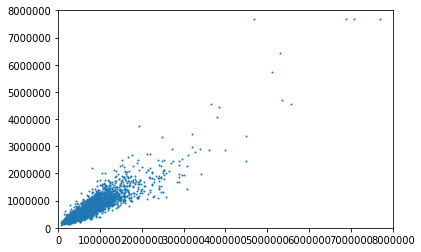

In [50]:
reg = lm.LinearRegression()
y_log = np.log(y)
reg.fit(X_train, y_log)

pred = reg.predict(X_train)
pred = np.exp(pred)
pred[pred>df_train['price'].max()] = df_train['price'].max()
pred[pred<df_train['price'].min()] = df_train['price'].min()

print('MSE is: ', np.sqrt(mse(y, pred)))
print('R2 is: ', r2_score(y, pred))

plt.scatter(y, pred, s=1)
plt.xlim(0,8000000)
plt.ylim(0,8000000)
plt.show()

# 2nd order Polynomial 

MSE is:  127752.53822314122
R2 is:  0.8851850797157602


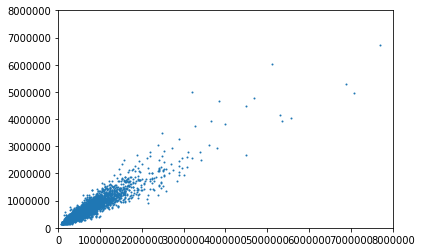

In [58]:
poly = PolynomialFeatures(2)
X_train2 = poly.fit_transform(X_train)
polynames = poly.get_feature_names(X_train.columns)
X_train2 = pd.DataFrame(X_train2, columns=polynames)

reg2 = lm.LinearRegression()
reg2.fit(X_train2, y_log)

pred2 = reg2.predict(X_train2)
pred2 = np.exp(pred2)
pred2[pred2>df_train['price'].max()] = df_train['price'].max()
pred2[pred2<df_train['price'].min()] = df_train['price'].min()

print('MSE is: ', np.sqrt(mse(y, pred2)))
print('R2 is: ', r2_score(y, pred2))

plt.scatter(y, pred2, s=1)
plt.xlim(0,8000000)
plt.ylim(0,8000000)
plt.show()


# 3rd order Polynomial

MSE is:  109085.89037386068
R2 is:  0.9162863236015779


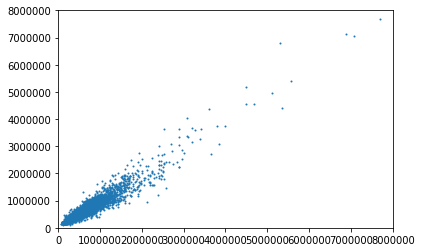

In [59]:
poly = PolynomialFeatures(3)
X_train3 = poly.fit_transform(X_train)
polynames = poly.get_feature_names(X_train.columns)
X_train3 = pd.DataFrame(X_train3, columns=polynames)

reg3 = lm.LinearRegression()
reg3.fit(X_train3, y_log)

pred3 = reg3.predict(X_train3)
pred3 = np.exp(pred3)
pred3[pred3>df_train['price'].max()] = df_train['price'].max()
pred3[pred3<df_train['price'].min()] = df_train['price'].min()

print('MSE is: ', np.sqrt(mse(y, pred3)))
print('R2 is: ', r2_score(y, pred3))

plt.scatter(y, pred3, s=1)
plt.xlim(0,8000000)
plt.ylim(0,8000000)
plt.show()


# Standard Scaler I

MSE is:  157383.8052784534
R2 is:  0.8257473719799426


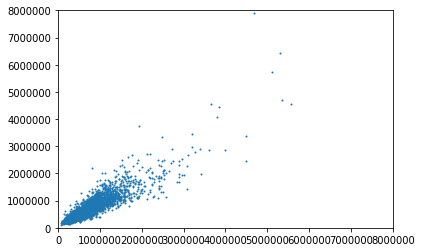

In [64]:
scaleit = StandardScaler()

X_train4 = scaleit.fit_transform(X_train)
X_train4 = pd.DataFrame(X_train4, columns=X_train.columns)

reg4 = lm.LinearRegression()
reg4.fit(X_train4, y_log)

pred4 = reg4.predict(X_train4)
pred4 = np.exp(pred4)


print('MSE is: ', np.sqrt(mse(y, pred4)))
print('R2 is: ', r2_score(y, pred4))

plt.scatter(y, pred4, s=1)
plt.xlim(0,8000000)
plt.ylim(0,8000000)
plt.show()


# Scaling 3rd order Polynomial

MSE is:  89203.12748472058
R2 is:  0.9440217373244977


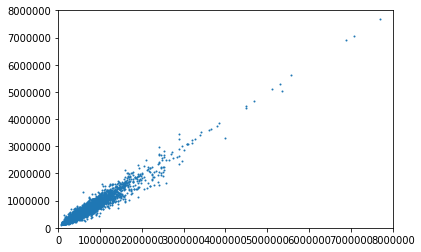

In [66]:
scaleit = StandardScaler()

X_train5 = scaleit.fit_transform(X_train3)
X_train5 = pd.DataFrame(X_train5, columns=X_train3.columns)

reg5 = lm.LinearRegression()
reg5.fit(X_train5, y_log)

pred5 = reg5.predict(X_train5)
pred5 = np.exp(pred5)


print('MSE is: ', np.sqrt(mse(y, pred5)))
print('R2 is: ', r2_score(y, pred5))

plt.scatter(y, pred5, s=1)
plt.xlim(0,8000000)
plt.ylim(0,8000000)
plt.show()
